add info about why this matters, add more comments in the code<br>
do i need the raw data stuff? i think i want to show how the data came originally, but im not sure if its important

# Characterizing a data set with Zipf's Law
**Background:** Zipf's Law notices that the frequency distribution of many data sets that involve human choice, such as the most commonly used words or letters in books, follow a pattern where the nth-most-common data point will occur approximately 1/n the amount of times as the most common data point. One way to characterize this mathematically is with the following equation:
$$ f(r) \sim r^{-\alpha} $$
where $r$ is the "rank" of the data point and $\alpha$ is approximately 1 [\[1\]](#Sources). This has been examined in word distributions for multiple languages by using large data sets (books, plays, and all of Wikipedia are some examples) [\[2\]](#Sources).

**Source:** Data consists of chat logs in a Discord group chat collected from 3 November 2019 to 21 February 2022. It was collected with Discord Chat Exporter.

**Question:** Does the data provided follow a Zipfian distribution?

In [12]:
# import relevant packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from sklearn.metrics import r2_score

The data was originally a csv, where each entry consisted of a full message.

In [2]:
raw_data = pd.read_csv('raw_data.csv')

print("The data set had " + str(raw_data.size) + " messages.")
raw_data.head()

The data set had 91730 messages.


,Content
0,"Love your status, but why are you doing homewo..."
1,",,"
2,im trYing
3,;-;;;
4,Look it’s my art hw how does it look so far?


It was then separated into separate words then normalized by making it lowercase. Additionally, a `Count` column was added for counting purposes later.

In [3]:
words_df = pd.read_csv('separated_words.csv')
words_df['Words'] = words_df['Words'].str.lower()

print("The data set had " + str(words_df.size) + " words.")
words_df.head()

The data set had 1371692 words.


,Words,Count
0,love,0
1,",,",0
2,im,0
3,;-;;;,0
4,look,0


Finally, the data was grouped by separate words and counted.

In [4]:
grouped = words_df.groupby(['Words']).count().reset_index()
grouped = grouped.sort_values('Count', ascending = False).reset_index(drop = True)

print("The data set had " + str(grouped.size) + " unique words.")
grouped.head()

The data set had 79376 unique words.


,Words,Count
0,i,29201
1,the,19052
2,to,13683
3,and,13252
4,a,10117


Some notable entries of the ranked words include

In [5]:
special = grouped.loc[~grouped['Words'].str.contains("[{}|~\\a-z0-9:;,.\-`_]", flags = re.I, regex = True)]
special.loc[special.index <= 500]

,Words,Count
22,😔,3916
211,😔😔,479
372,💤,253


In the top 500 words, there are three emoticon "words," two of which are the same emoticon and one of which is in the top 100.

# Zipf Distribution Tests
### When graphing frequency distributions, do they seem to follow Zipf's Law?

There is a lot of data in the set, so the results are probably accurate.

#### First test: plotting rank vs frequency and finding the slope of the loglog graph

Slope of line of best fit: -1.189628485809304


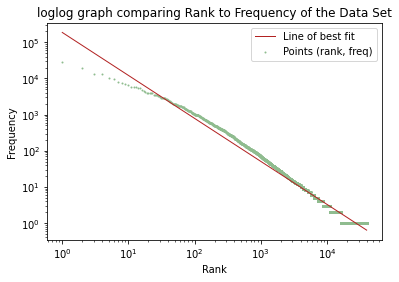

r-squared value: 0.9556071429750119


In [27]:
top_100 = grouped.iloc[0:100]
MAX_COUNT = grouped.iloc[0].Count
rank = grouped.index + 1

rank_vs_freq = plt.scatter(rank, grouped.Count, s=1, color = 'darkseagreen')

plt.xscale('log')
plt.yscale('log')

# linear regression should give a good fit for the model if it is Zipfian
m, b = np.polyfit(np.log(rank), np.log(grouped.Count), 1)
y_hat = np.exp(m * np.log(rank) + b)
r_squared = r2_score(np.log(y_hat), np.log(grouped.Count))
print('Slope of line of best fit:', m)

plt.plot(rank, np.exp(m*np.log(rank) + b), color = 'firebrick', linewidth = 1)

plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title('loglog graph comparing Rank to Frequency of the Data Set')

plt.legend(['Line of best fit', 'Points (rank, freq)'])

plt.show()
print('r-squared value:', r_squared)

The coefficient of determination makes it seem like the data is linear on the loglog graph, which is important when determining if a data set of natural language has a Zipfian or near-Zipfian distribution. Thus we can say a linear model fits the loglog graph of the rank vs frequency distribution.

It is however interesting how the data does not seem to be noisy around the line of best fit, but instead starts below then moves above the line and ends below again. Does this mean the natural language of texting is not Zipfian? We will see in the future tests.

#### Second test: Bar Chart vs Zipf approximation

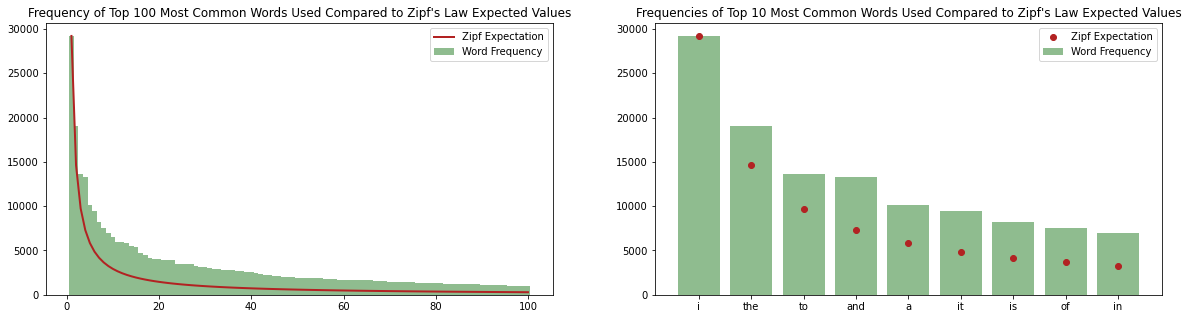

In [11]:
top_10 = grouped.iloc[0:9]
sum_100 = np.sum(top_100['Count'].values)
sum_10 = np.sum(top_10['Count'].values)

# comparison of data to Zipf's Law

fig_1 = plt.figure(1, figsize = (20, 5))

# make the bar chart and Zipf line for the top 100 words
graph_100 = fig_1.add_subplot(121)

graph_100.bar(np.arange(1,101,1), top_100['Count'].values, color = 'darkseagreen', width = 1.0)
graph_100.plot(np.arange(1, 101, 1), MAX_COUNT*np.power(np.arange(1, 101, 1),-1.), color = 'firebrick', linewidth = 2)
plt.title('Frequency of Top 100 Most Common Words Used Compared to Zipf\'s Law Expected Values')
graph_100.legend(['Zipf Expectation', 'Word Frequency'])

# make the same bar chart and line for the top 10 words
graph_10 = fig_1.add_subplot(122)

graph_10.bar(top_10['Words'].values, top_10['Count'].values, color = 'darkseagreen')
graph_10.plot(top_10['Words'].values, MAX_COUNT*np.power((top_10.index + 1),-1.), color = 'firebrick', marker = 'o', linewidth = 0)
plt.title('Frequencies of Top 10 Most Common Words Used Compared to Zipf\'s Law Expected Values')
graph_10.legend(['Zipf Expectation', 'Word Frequency'])

plt.show()

The graphs comparing the bar chart to the line suggest that the data seems to not follow Zipf's Law exactly for frequency distributions, but it does seem to curve in a similar way. However, the function mentioned in the Background section of the introduction is not an equivalence but rather an approximation; a similarity between the two sides of the $\sim$ sign. Thus, because the frequency distribution is similar to the expectation, it is safe to say that it is Zipfian.

## Additional Questions for testing Zipfian distribution

In Stevens' video, he recognized that the top 100 data points made up approximately half of the total frequency and that the top 20% of data points made up 80% of the total frequency for some Zipfian distributions.

### Do the top 100 words make up approximately half of the total frequency?

In [ ]:
total_words = np.sum(grouped.Count)
proportion_100 = sum_100/total_words
print(proportion_100)

Yes, they do, which is some evidence to support using Zipf's Law to characterize the distribution of the word count data.

### Do the top 20% of words make up approximately 80% of the total frequency?

In [ ]:
amount_in_top_20 = int(0.2 * len(grouped.Count))
top_20 = grouped.iloc[0:amount_in_top_20]
freq_20 = np.sum(top_20['Count'].values)
proportion_20 = freq_20/total_words
print(proportion_20)

This is much larger than 80%, which might give an insight as to why the data does not appear Zipfian in the graphs.

# Conclusion

The data set appears to follow Zipf's Law for frequency distributions.

The fact that the graphs (when comparing the bar chart and Zipf expectation) did not look "ideally" Zipfian is not a problem, as the general trend is more important. This can be seen more explicitly in the first test, as the loglog graph takes an almost-linear form. The questions about top 100 words and top 20% of words were inspired by Stevens, as he mentioned some studies where 44% and 49% of the data had "hapax legomena," or words that appeared only once in the set [\[2\]](#Sources). With the data set consisting of casual conversation between high school to college-age teenagers over a messaging app, perhaps they were less likely to use bigger, more "rare" words. Instead, they used the top 20% of the most common words 93% of the time. This would also explain why the graphs in the second test did not follow Zipf's Law as expected.

## Sources
1. Thurner, S., Hanel, R., Liu, B., & Corominas-Murtra, B. (2015). Understanding Zipf's law of word frequencies through sample-space collapse in sentence formation. Journal of the Royal Society, Interface, 12(108), __[NLM](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4528601/)__
    - used for understanding what Zipfian distributions look like (used for graph analysis)
    - helped increase understanding of Zipf's Law
    
    
2. Stevens, Michael. (15 Sep 2015). __[The Zipf Mystery](https://www.youtube.com/watch?v=fCn8zs912OE)__. YouTube, Vsauce.
    - inspiration for comparing data to Zipf's Law
    - basic understanding of the law
    
https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4176592/